# <font color="blue">Lesson 3 Basic Models</font>

# Testing Regression Algorithms on the Same Dataset

I'm using a KFold validation on the Boston House Pricing Dataset (downloaded from Kaggle) with several regression algorithms. This dataset is designed to predict median value (continuous) based on a variety of features, including the proximity to the Charles River. 

Don't worry about the "details" for now. Just focus on the testing of the accuracy of these side by side. This is a method you can use to identify the best classifier for a particular type of problem.

**Linear**
* Linear Regression
* Ridge Regression (L2-Norm)
* Least Absolute Shrinkage and Selection Operator (LASSO) (L1-Norm)
* ElasticNet (L1- and L2-Norm)

**Nonlinear**
* kNN Regressor
* Regressor tree 
* Support Vector Regressor (SVR)

In [1]:
# Load Boston Housing Data

import pandas as pd
import numpy as np

# read in the file and assign headers
headers = ['crime', 'zone_res','zone_ind', 'C_river', 'NOX', 'rooms', 'age', 'dist', 'hwy_acc', 
         'prop_tax', 'PT_ratio', 'AA_prop', 'low_inc', 'median_val' ]
df = pd.read_csv('https://library.startlearninglabs.uw.edu/DATASCI420/Datasets/housing.csv', 
                 delim_whitespace=True, names=headers) 

x1 = df.iloc[:, 0:13]   # load features into X DF
y1 = df.iloc[:, 13]     # Load target into Y DF
df.describe()

,crime,zone_res,zone_ind,C_river,NOX,rooms,age,dist,hwy_acc,prop_tax,PT_ratio,AA_prop,low_inc,median_val
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


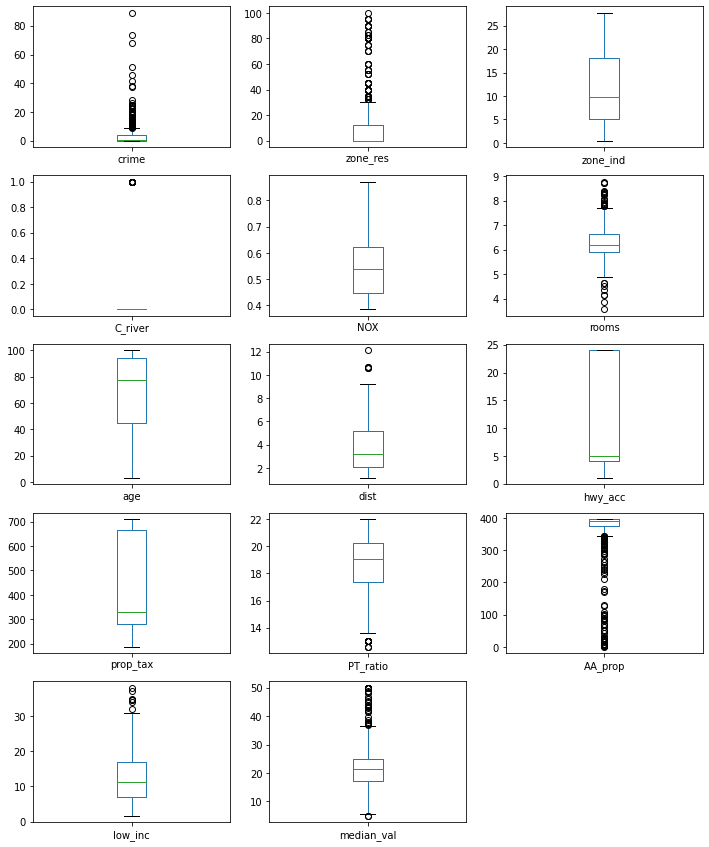

In [2]:
from matplotlib import pyplot

df.plot(kind='box', subplots=True, layout=(5,3), sharex=False, sharey=False, figsize=(12,15))
pyplot.show()

## Linear Algorithms for Regression 

### Linear Regression
Assumes the following:
* a normal distribution
* all of the independent variables are relevant to the dependent variable
* the independent variables are not highly correlated with one another (no co-linearity)

In [3]:
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.linear_model import LinearRegression

kfold = KFold(n_splits=10, random_state=7)  # 10 fold cross validation ; 
                                            # 7 random state is to assure consistent results

lin_reg_results = cross_val_score(LinearRegression(), x1, y1, cv=kfold, scoring='neg_mean_squared_error') 
print("Negative MAE-> mean:%.3f (std:%.3f)" % (lin_reg_results.mean(), lin_reg_results.std()))

C:\Users\v-trugan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Negative MAE-> mean:-34.705 (std:45.574)


### Ridge Regression
Ridge is an extension of linear regression where the loss function is modiﬁed to minimize the complexity of the model measured as the sum squared value of the coeﬃcient values (AKA L2-norm).

In [4]:
from sklearn.linear_model import Ridge 
rid_reg_results = cross_val_score(Ridge(), x1, y1, cv=kfold, scoring='neg_mean_squared_error')
print("Negative MAE-> mean:%.3f (std:%.3f)" % (rid_reg_results.mean(), rid_reg_results.std()))

Negative MAE-> mean:-34.078 (std:45.900)


### LASSO Regression (Least Absolute Shrinkage and Selection Operator)
Modified linear regression where the loss function is modified to minimize the complexity of the model as measured by sum of the absolute vale of the coefficients (AKA L1-norm). 

In [5]:
from sklearn.linear_model import Lasso

lasso_results = cross_val_score(Lasso(), x1, y1, cv=kfold, scoring='neg_mean_squared_error')
print("Negative MAE-> mean:%.3f (std:%.3f)" % (lasso_results.mean(), lasso_results.std()))

Negative MAE-> mean:-34.464 (std:27.889)


### ElasticNet Regression
Combines the properties of both LASSO and Ridge regressions--to minimize the complexity of a regression model--in both magnitude and regression coeficients--by penalizing the model using both L2 (sum of squared coefficient values) and L1-norm (sum absolute coefficient values). 

In [6]:
from sklearn.linear_model import ElasticNet

elast_results = cross_val_score(ElasticNet(), x1, y1, cv=kfold, scoring='neg_mean_squared_error')
print("Negative MAE-> mean:%.3f (std:%.3f)" % (elast_results.mean(), elast_results.std()))

Negative MAE-> mean:-31.165 (std:22.709)


## Non-linear Regression Algorithms
### kNN Regressor
kNN regressors use a mean or median output variable is taken as the prediction of similarity to new inputs. The distance metric used is Minkowski by default, which is a generalization of both the Euclidean distance (used when all inputs have the same scale) and Manhattan distance (used when the scales of the input variables diﬀer).

In [7]:
from sklearn.neighbors import KNeighborsRegressor

kNN_results = cross_val_score(KNeighborsRegressor(), x1, y1, cv=kfold, scoring='neg_mean_squared_error')
print("Negative MAE-> mean:%.3f (std:%.3f)" % (kNN_results.mean(), kNN_results.std()))

Negative MAE-> mean:-107.287 (std:79.840)


### CART
Like the decision tree classifier except for continuous variables

In [8]:
from sklearn.tree import DecisionTreeRegressor

reg_tree_results = cross_val_score(DecisionTreeRegressor(), x1, y1, cv=kfold, scoring='neg_mean_squared_error')
print("Negative MAE-> mean:%.3f (std:%.3f)" % (reg_tree_results.mean(), reg_tree_results.std()))

Negative MAE-> mean:-39.253 (std:32.089)


### SVR
Like the Support Vector classifier except for continuous variables. 

In [9]:
from sklearn.svm import SVR

svr_results = cross_val_score(SVR(), x1, y1, cv=kfold, scoring='neg_mean_squared_error')
print("Negative MAE-> mean:%.3f (std:%.3f)" % (svr_results.mean(), svr_results.std()))

Negative MAE-> mean:-72.255 (std:61.961)


In [10]:
print("LinearNeg MAE-> mean:%.3f (std:%.3f)" % (lin_reg_results.mean(), lin_reg_results.std()))
print("Ridge Neg MAE-> mean:%.3f (std:%.3f)" % (rid_reg_results.mean(), rid_reg_results.std()))
print("LASSO Neg MAE-> mean:%.3f (std:%.3f)" % (lasso_results.mean(), lasso_results.std()))
print("Elast Neg MAE-> mean:%.3f (std:%.3f)" % (elast_results.mean(), elast_results.std()))
print("kNN   Neg MAE-> mean:%.3f (std:%.3f)" % (kNN_results.mean(), kNN_results.std()))
print("CART  Neg MAE-> mean:%.3f (std:%.3f)" % (reg_tree_results.mean(), reg_tree_results.std()))
print("SVR   Neg MAE-> mean:%.3f (std:%.3f)" % (svr_results.mean(), svr_results.std()))

LinearNeg MAE-> mean:-34.705 (std:45.574)
Ridge Neg MAE-> mean:-34.078 (std:45.900)
LASSO Neg MAE-> mean:-34.464 (std:27.889)
Elast Neg MAE-> mean:-31.165 (std:22.709)
kNN   Neg MAE-> mean:-107.287 (std:79.840)
CART  Neg MAE-> mean:-39.253 (std:32.089)
SVR   Neg MAE-> mean:-72.255 (std:61.961)
